<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0229_Matplotlib_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/ta_20240229153858.csv', encoding='cp949', skiprows=6)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2013-01-01,112,-3.3,-7.0,0.3
1,\t2013-01-02,112,-10.7,-14.3,-5.8
2,\t2013-01-03,112,-12.2,-15.4,-8.5
3,\t2013-01-04,112,-10.0,-14.3,-6.0
4,\t2013-01-05,112,-5.9,-11.1,-0.7


In [4]:
df.shape

(4076, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       4076 non-null   object 
 1   지점       4076 non-null   int64  
 2   평균기온(℃)  4076 non-null   float64
 3   최저기온(℃)  4076 non-null   float64
 4   최고기온(℃)  4076 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 159.3+ KB


In [6]:
df['날짜'] = df['날짜'].str.replace('\t', '')
df['날짜']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
4071    2024-02-24
4072    2024-02-25
4073    2024-02-26
4074    2024-02-27
4075    2024-02-28
Name: 날짜, Length: 4076, dtype: object

In [11]:
# replace로 변경하는 방법
# df['date'] = df['date'].str.replace('\t','')

# split으로 변경하는 방법
# split_data = df['date'].str.split('\t')
# df['date1'] = split_data.str.get(1)

# 정규표현식
# import re
# pettern = re.compile('\S')
# df['date2'] = df['date'].apply(lambda x : ''.join(pettern.findall(x)))
# df.head()

# 인덱싱 방법
# df['date3'] = df['date'].apply(lambda x : x[1:])

In [10]:
df.columns = ['date', 'local', 'avg', 'min', 'max']
# df.rename(columns={'날짜':'date', '지점':'local', '평균기온(℃)':'avg', '최저기온(℃)':'min', '최고기온(℃)':'max'}, inplace=True)
df

,date,local,avg,min,max
0,2013-01-01,112,-3.3,-7.0,0.3
1,2013-01-02,112,-10.7,-14.3,-5.8
2,2013-01-03,112,-12.2,-15.4,-8.5
3,2013-01-04,112,-10.0,-14.3,-6.0
4,2013-01-05,112,-5.9,-11.1,-0.7
...,...,...,...,...,...
4071,2024-02-24,112,2.3,-0.5,6.0
4072,2024-02-25,112,2.4,0.7,5.5
4073,2024-02-26,112,3.8,-0.3,8.0
4074,2024-02-27,112,5.6,1.8,9.6


In [12]:
df.describe()

,local,avg,min,max
count,4076.0,4076.000000,4076.000000,4076.000000
mean,112.0,12.746369,9.533023,16.483808
std,0.0,10.186662,10.402634,10.212927
min,112.0,-14.600000,-17.500000,-11.900000
25%,112.0,4.000000,0.600000,7.700000
50%,112.0,13.600000,10.100000,17.700000
75%,112.0,22.000000,18.800000,25.500000
max,112.0,31.800000,29.100000,36.000000


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4076 non-null   datetime64[ns]
 1   local   4076 non-null   int64         
 2   avg     4076 non-null   float64       
 3   min     4076 non-null   float64       
 4   max     4076 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 159.3 KB


In [34]:
# 가장 더웠던 온도를 찾고 그 날짜를 출력하시오.
# max 중에 최고 온도를 찾을 때
max_temp = df['max'].max()
max_temp
max_date = df[df['max'] == max_temp]['date']
print(max_date.astype('str').values, max_temp)

['2019-08-10'] 36.0


In [35]:
# avg 중에 최고 온도를 찾을 때
avg_temp = df['avg'].max()
avg_temp
avg_date = df[df['avg'] == avg_temp]['date']
print(avg_date.astype('str').values, avg_temp)

['2018-08-02'] 31.8


In [36]:
# min 중에 최고 온도를 찾을 때
min_temp = df['min'].max()
min_temp
min_date = df[df['min'] == min_temp]['date']
print(min_date.astype('str').values, min_temp)

['2018-08-02'] 29.1


In [37]:
# 가장 추웠던 온도를 찾고 그 날짜를 출력하시오.
# min 중에 최저 온도를 찾을 때
min_temp = df['min'].min()
min_temp
min_date = df[df['min'] == min_temp]['date']
print(min_date.astype('str').values, min_temp)

['2021-01-08'] -17.5


In [38]:
# avg 중에 최저 온도를 찾을 때
avg_temp = df['avg'].min()
avg_temp
avg_date = df[df['avg'] == avg_temp]['date']
print(avg_date.astype('str').values, avg_temp)

['2018-01-26' '2023-01-24'] -14.6


In [39]:
# max 중에 최저 온도를 찾을 때
max_temp = df['max'].min()
max_temp
max_date = df[df['max'] == max_temp]['date']
print(max_date.astype('str').values, max_temp)

['2018-01-26'] -11.9


In [40]:
# 일교차 가장 큰 날 찾기
df['diff'] = df['max'] - df['min']
df.head()
diff_temp = df['diff'].max()
diff_date = df[df['diff'] == diff_temp]['date']
print(diff_date.astype('str').values, diff_temp)

['2022-11-29'] 16.2


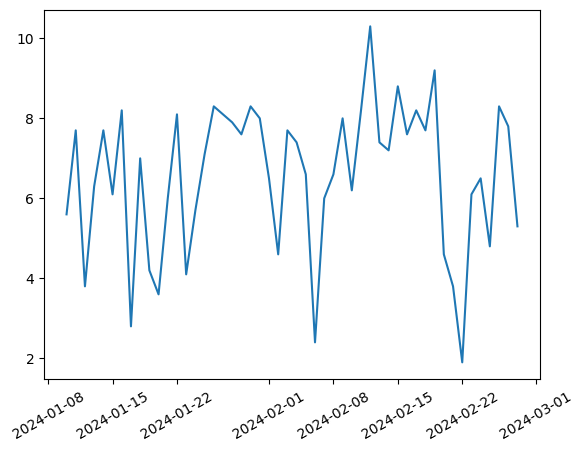

In [46]:
# 최근 50일에 대한 일교차 그래프를 생성하시오.
df.sort_index(ascending=False, inplace=True)

plt.plot(df['date'][:50], df['diff'][:50])
plt.xticks(rotation=30)
plt.show()

다음 데이터를 4계절로 분할하고 매년 각 계절의 최고온도와 최저온도를 나타내는 2개의 데이터프레임을 생성하시오.

In [47]:
df.sort_index(ascending=True, inplace=True)

In [49]:
df['date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
4071    2
4072    2
4073    2
4074    2
4075    2
Name: date, Length: 4076, dtype: int64

In [50]:
df['month'] = df['date'].dt.month

In [52]:
def season(x):
  if x <=3:
    x = str(x).replace(str(x), 'Winter')
  elif x <=6:
    x = str(x).replace(str(x), 'Spring')
  elif x <=9:
    x = str(x).replace(str(x), 'Summer')
  else:
    x = str(x).replace(str(x), 'Fall')
  return x

In [53]:
df['season'] = df['month'].apply(season)
df

,date,local,avg,min,max,diff,month,season
0,2013-01-01,112,-3.3,-7.0,0.3,7.3,1,Winter
1,2013-01-02,112,-10.7,-14.3,-5.8,8.5,1,Winter
2,2013-01-03,112,-12.2,-15.4,-8.5,6.9,1,Winter
3,2013-01-04,112,-10.0,-14.3,-6.0,8.3,1,Winter
4,2013-01-05,112,-5.9,-11.1,-0.7,10.4,1,Winter
...,...,...,...,...,...,...,...,...
4071,2024-02-24,112,2.3,-0.5,6.0,6.5,2,Winter
4072,2024-02-25,112,2.4,0.7,5.5,4.8,2,Winter
4073,2024-02-26,112,3.8,-0.3,8.0,8.3,2,Winter
4074,2024-02-27,112,5.6,1.8,9.6,7.8,2,Winter


In [54]:
df['year'] = df['date'].dt.year
df

,date,local,avg,min,max,diff,month,season,year
0,2013-01-01,112,-3.3,-7.0,0.3,7.3,1,Winter,2013
1,2013-01-02,112,-10.7,-14.3,-5.8,8.5,1,Winter,2013
2,2013-01-03,112,-12.2,-15.4,-8.5,6.9,1,Winter,2013
3,2013-01-04,112,-10.0,-14.3,-6.0,8.3,1,Winter,2013
4,2013-01-05,112,-5.9,-11.1,-0.7,10.4,1,Winter,2013
...,...,...,...,...,...,...,...,...,...
4071,2024-02-24,112,2.3,-0.5,6.0,6.5,2,Winter,2024
4072,2024-02-25,112,2.4,0.7,5.5,4.8,2,Winter,2024
4073,2024-02-26,112,3.8,-0.3,8.0,8.3,2,Winter,2024
4074,2024-02-27,112,5.6,1.8,9.6,7.8,2,Winter,2024


In [55]:
df_max = df.groupby(['year', 'season']).max()
df_max

date  local   avg   min   max  diff  month
year season                                                 
2013 Fall   2013-12-31    112  22.6  20.2  26.3  11.1     12
     Spring 2013-06-30    112  25.6  21.6  30.2  12.1      6
     Summer 2013-09-30    112  28.3  26.9  32.0  10.3      9
     Winter 2013-03-31    112  11.5   5.4  20.4  15.0      3
2014 Fall   2014-12-31    112  21.0  17.3  27.5  14.5     12
     Spring 2014-06-30    112  23.8  21.1  28.9  12.6      6
     Summer 2014-09-30    112  30.8  28.3  35.3  10.3      9
     Winter 2014-03-31    112  14.8  12.0  21.5  13.7      3
2015 Fall   2015-12-31    112  19.7  16.8  24.0  12.2     12
     Spring 2015-06-30    112  24.0  21.0  28.6  15.2      6
     Summer 2015-09-30    112  28.9  25.5  33.1  11.5      9
     Winter 2015-03-31    112  12.4   9.3  17.6  14.3      3
2016 Fall   2016-12-31    112  22.4  18.8  27.7  10.9     12
     Spring 2016-06-30    112  24.1  21.8  29.3  15.8      6
     Summer 2016-09-30    112  29.8  27.4  34.0  10.4      9
     Winter 2016-03-31    112  13.5   8.4  19.5  12.4      3
2017 Fall   2017-12-31    112  21.2  19.1  26.0  11.4     12
     Spring 2017-06-30    112  24.4  21.5  29.4  13.1      6
     Summer 2017-09-30    112  30.9  27.6  34.0   9.5      9
     Winter 2017-03-31    112   9.5   7.1  15.6  11.8      3
2018 Fall   2018-12-31    112  20.1  16.2  24.7  10.1     12
     Spring 2018-06-30    112  24.7  20.3  29.0  13.2      6
     Summer 2018-09-30    112  31.8  29.1  35.9  10.9      9
     Winter 2018-03-31    112  15.5  12.4  19.5  13.0      3
2019 Fall   2019-12-31    112  23.1  20.3  27.5  12.9     12
     Spring 2019-06-30    112  24.4  21.8  28.7  15.2      6
     Summer 2019-09-30    112  31.4  28.2  36.0  11.7      9
     Winter 2019-03-31    112  10.1   7.0  14.4  13.3      3
2020 Fall   2020-12-31    112  19.6  17.9  22.4  12.4     12
     Spring 2020-06-30    112  25.7  21.4  31.7  13.9      6
     Summer 2020-09-30    112  30.0  27.0  33.9  10.1      9
     Winter 2020-03-31    112  14.7  10.2  19.9  11.6      3
2021 Fall   2021-12-31    112  23.5  21.6  26.9  13.1     12
     Spring 2021-06-30    112  24.6  22.2  29.8  14.4      6
     Summer 2021-09-30    112  30.6  27.5  34.5   9.1      9
     Winter 2021-03-31    112  12.7  10.1  19.0  14.2      3
2022 Fall   2022-12-31    112  21.9  19.2  23.2  16.2     12
     Spring 2022-06-30    112  25.8  24.5  29.2  12.6      6
     Summer 2022-09-30    112  31.1  27.8  35.2  10.1      9
     Winter 2022-03-31    112  12.3   8.4  17.2  11.0      3
2023 Fall   2023-12-31    112  19.7  17.8  23.4  13.5     12
     Spring 2023-06-30    112  26.7  22.1  31.8  14.6      6
     Summer 2023-09-30    112  30.7  27.1  34.6   9.1      9
     Winter 2023-03-31    112  14.4  10.5  20.9  13.5      3
2024 Winter 2024-02-28    112  11.6   7.8  15.0  10.3      2

In [56]:
df_min = df.groupby(['year', 'season']).min()
df_min

date  local   avg   min   max  diff  month
year season                                                 
2013 Fall   2013-10-01    112  -6.0  -8.1  -4.0   3.2     10
     Spring 2013-04-01    112   4.6   1.9   8.1   1.5      4
     Summer 2013-07-01    112  17.1  12.8  19.3   0.9      7
     Winter 2013-01-01    112 -12.2 -15.9  -8.5   2.7      1
2014 Fall   2014-10-01    112  -7.8 -11.4  -5.4   2.6     10
     Spring 2014-04-01    112   6.1   3.1   9.2   1.7      4
     Summer 2014-07-01    112  18.9  14.7  20.5   0.8      7
     Winter 2014-01-01    112  -7.2  -9.5  -4.8   3.2      1
2015 Fall   2015-10-01    112  -5.7  -8.5  -2.8   1.9     10
     Spring 2015-04-01    112   7.4   3.3   8.6   1.9      4
     Summer 2015-07-01    112  19.8  15.6  23.4   1.7      7
     Winter 2015-01-01    112  -9.2 -11.2  -5.1   2.1      1
2016 Fall   2016-10-01    112  -4.1  -7.7  -1.9   2.4     10
     Spring 2016-04-01    112   8.1   5.8  11.8   3.6      4
     Summer 2016-07-01    112  19.0  15.4  20.8   2.2      7
     Winter 2016-01-01    112 -13.1 -16.3 -10.5   3.1      1
2017 Fall   2017-10-01    112  -8.7 -11.1  -6.2   3.1     10
     Spring 2017-04-01    112   7.9   4.5  10.4   2.2      4
     Summer 2017-07-01    112  17.5  12.9  20.9   1.7      7
     Winter 2017-01-01    112  -7.9 -11.1  -5.1   2.4      1
2018 Fall   2018-10-01    112  -9.6 -13.2  -7.0   2.9     10
     Spring 2018-04-01    112   4.5   0.4   7.2   2.8      4
     Summer 2018-07-01    112  18.1  12.5  20.0   2.0      7
     Winter 2018-01-01    112 -14.6 -17.1 -11.9   3.4      1
2019 Fall   2019-10-01    112  -7.3  -9.9  -5.3   3.8     10
     Spring 2019-04-01    112   6.0   3.3   9.7   2.1      4
     Summer 2019-07-01    112  19.2  14.1  20.5   1.2      7
     Winter 2019-01-01    112  -6.8 -10.4  -3.6   3.1      1
2020 Fall   2020-10-01    112 -10.6 -11.9  -6.6   3.3     10
     Spring 2020-04-01    112   6.6   3.0   8.3   2.1      4
     Summer 2020-07-01    112  18.7  15.3  21.9   1.4      7
     Winter 2020-01-01    112  -8.1 -10.6  -4.9   2.0      1
2021 Fall   2021-10-01    112 -11.5 -14.3  -7.8   2.1     10
     Spring 2021-04-01    112   8.0   4.9  11.0   1.4      4
     Summer 2021-07-01    112  20.0  16.9  21.6   2.0      7
     Winter 2021-01-01    112 -14.5 -17.5 -10.9   3.3      1
2022 Fall   2022-10-01    112 -11.3 -12.8  -9.4   3.3     10
     Spring 2022-04-01    112   6.8   3.6  11.4   1.4      4
     Summer 2022-07-01    112  17.8  13.2  20.6   1.8      7
     Winter 2022-01-01    112  -7.5 -10.3  -4.9   1.9      1
2023 Fall   2023-10-01    112 -11.6 -14.2  -8.9   2.1     10
     Spring 2023-04-01    112   7.7   3.9   8.4   1.7      4
     Summer 2023-07-01    112  19.8  16.9  20.9   1.2      7
     Winter 2023-01-01    112 -14.6 -16.7  -7.6   2.8      1
2024 Winter 2024-01-01    112 -11.5 -13.6  -9.5   1.9      1

연도별 여름(summer)최고 기온과 겨울(winter) 최저기온을 하나의 그래프로 표현하시오.

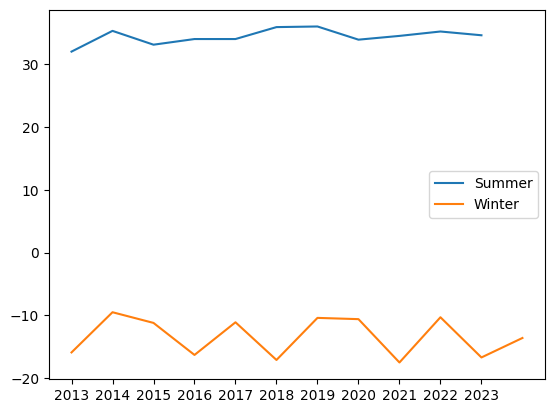

In [65]:
summer_temp = df.groupby(['season', 'year']).max().iloc[22:33, 4].values
winter_temp = df.groupby(['season', 'year']).min().iloc[33:, 3].values

plt.plot(summer_temp, label='Summer')
plt.plot(winter_temp, label='Winter')
plt.xticks(range(0,11), range(2013, 2024))
plt.legend()
plt.show()

각 연도별 평균기온을 그래프로 출력하시오.

<ipython-input-71-4966e738a440>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_temp = df.groupby(['year']).mean().iloc[:, 1].values


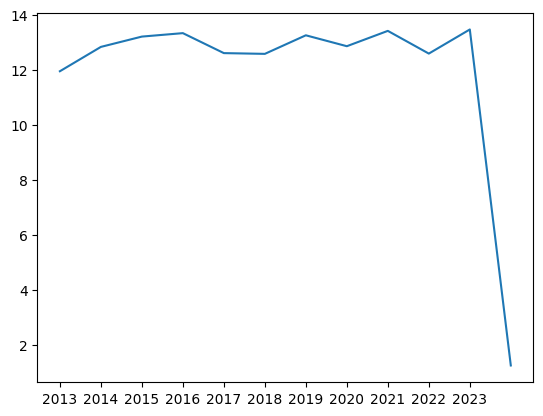

In [71]:
year_temp = df.groupby(['year']).mean().iloc[:, 1].values

plt.plot(year_temp)
plt.xticks(range(0,11), range(2013,2024))
plt.show()

전체 데이터에서 일일 최고온도들의 히스토그램을 출력하시오.

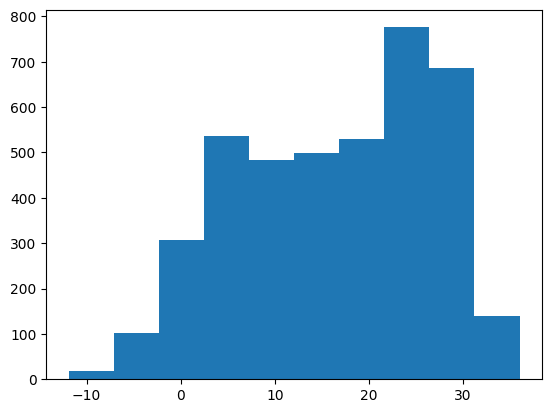

In [74]:
plt.hist(df['max'], bins=10)
plt.show()